In [81]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("/opt/ml/input/data/train_data.csv")
user_info = raw_data.pivot_table("answerCode","userID","assessmentItemID").fillna(2)
user_info_np = user_info.to_numpy()

In [73]:
## 문제를 많이 풀지 않은 학생들 제외
user_info_without_lazy = list()
for row in user_info_np :
    if len(np.where(row==1)[0]) > 100 : # 문제 개수 변경 가능!
        user_info_without_lazy.append(row)

In [75]:
model = TSNE(n_components=2) # n_componenets : 결과 data point의 차원

In [78]:
# 결과 도출 -> TODO : 전체 데이터 포함하고 싶으면 user_info_np 사용, 문제를 많이 안푼 학생 제외하고 싶으면 user_info_without_lazy 사용
# 대략 5~30초 사이 소요
result = model.fit_transform(user_info_np)

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


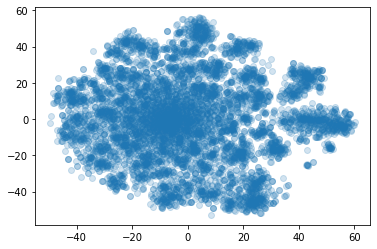

In [80]:
fig, ax = plt.subplots()
ax = plt.scatter(result[:,0],result[:,1], alpha=0.2)
plt.show()